## Tweets viejos

In [101]:
import pandas as pd
import re
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import tweepy

from unicodedata import normalize

import time

from matplotlib.font_manager import FontProperties



## MECHI, corre esto si necesitas los tweets de Elio

In [8]:
df_storm = pd.read_csv('tweets.csv', sep= ';')

## La autorización

In [9]:

# Consumer keys and access tokens, used for OAuth
consumer_key = '56jUXGuw12Fg2aHsztCJJZoSU'
consumer_secret = 'f8UEUXfwAeN198l2HNghfYrKGLH7xB888WhS9p3ofJVgEDfKb8'
access_token = '331388192-Lr6itQp6fom5tN5yNy5UP9jey9qake7EkUWqC7lh'
access_token_secret = '8VuGuoMG4Dp5g3AMK9tErdpiFP2Jfxiaa32ZeV4N3DCGM'
 
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
# Creation of the actual interface, using authentication
#api = tweepy.API(auth)

api = tweepy.API(auth,wait_on_rate_limit_notify=True)
time.sleep(1)
# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
 
print('Name: ' + user.name)
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: Empe
Location: 
Friends: 9


## Funciones de Scrap y diccionario

In [67]:
def scrapeo(hashtag,cantidad=1000,fecha='2017-09-10'):
    message,retweet_count,created_at,user_name,coord,geo,metadata=[],[],[],[],[],[],[]
    i = 0
    tweepy.Status
    for tweet in tweepy.Cursor(api.search,q="#"+str(hashtag),count = cantidad, lang = 'es', since = fecha,tweet_mode='extended').items():
        if 'RT' in tweet.full_text:
            continue
        message.append(tweet.full_text)
        retweet_count.append(tweet.retweet_count)
        created_at.append(tweet.created_at)
        user_name.append(tweet.user.name)
        coord.append(tweet.coordinates)
        geo.append(tweet.geo)
        metadata.append(tweet.metadata)
        i+=1
        if i%100 == 0: print (i,tweet.full_text)
        if i == 2000: break
    print (len(message),len(retweet_count),len(created_at),len(user_name),len(coord),len(geo))
    df=pd.DataFrame({'Message':message,
                    'Retweet Count':retweet_count,
                    'Created At':created_at,
                    'Username':user_name,
                     'Geo':geo,
                     'Coord':coord,
                     'Metadata':metadata
                    })
    df.to_csv("Twitter_%s.csv"%(hashtag))
    return(df)

    

def diccionario (msj):
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    palabras_borradas = "so|o|su|vos|re|pq|le|te|tu|soy|sos|mi|da|n|c|m|o|u|x|s|les|me|d|q|1|2|3|4|5|6|7|8|9|0|e|como|lo|los|mi|son|donde|a|el|un|la|una|en|por|para|ante|si|sobre|sin|al|rt|del|y|se|de|que|sus|ha|es|con|esta|ni|no"
    word_to_ix = {}
    word_cant = {}
    emoji = []
    emoji_ix = {}
    emoji_cant = {}

    for i,twit in enumerate(msj):

        txt = pattern.sub('',twit)
        txt = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", txt), 0, re.I)
        txt = normalize( 'NFC', txt)
        txt = txt.replace('\n','').replace('ñ','n').replace('\ufe0f','').replace('+','').replace('¡','').replace('¿','').replace('?','').replace('▯','').replace('(','').replace('|','').replace('!','').replace(')','').replace('.','').replace('-','').replace('_','').replace(',','').replace('#','').replace(':','')
        tt = txt
        for i in txt:
            if str(i).isascii()==False:
                tt = tt.replace(i,' '+i.encode('unicode-escape').decode('ASCII')+' ')
                emoji.append(i)
        txt = tt
                
        nlist = txt.lower().split(' ')


        for word in nlist:
            
            
            if re.match(palabras_borradas, word):
                continue
            if ('@' in word) and ('RELAMPAGO2018' not in word) and ('RELAMPAGO_edu' not in word) or ('jaj' in word):
                continue

            
            if word not in word_to_ix:
                word_to_ix[word] = len(word_to_ix)
                word_cant[word]  = 1
            else: word_cant[word]+=1
        for emo in emoji:
            if emo not in emoji_ix:
                emoji_ix[emo] = len(emoji_ix)
                emoji_cant[emo]  = 1
            else: emoji_cant[emo]+=1
                
    vocab_size = len(word_to_ix)
    num_labels = 2
    #print(emoji)

    return(word_to_ix,word_cant,emoji_ix,emoji_cant)

def makeImage(text):
    alice_mask = np.array(Image.open("cord.jpeg"))

    wc = WordCloud(background_color="white", max_words=200, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    fig = plt.figure(figsize=(20,20),dpi=100)
    plt.imshow(wc, interpolation="bilinear",cmap=plt.get_cmap("coolwarm"))
    #plt.axis("off")
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft = False)
    #plt.show()
    plt.savefig('Multiword')

100 Con mi respectiva taza de Chocolate Abuelita en esta lluviesita ☕🌧
#chocolateabuelita #Descanso #Lluvia @ Prados de Santa Catarina, Ciudad Santa Catarina https://t.co/sRmB08PVBb
200 #AlMomento ⚠  Reportan inundados los Carriles exprés de la Av Constitución a la altura de la pulga Río tome sus precauciones. #Monterrey 

@Cicmty @TraficoenMty @AsiEsMonterrey @pc_mty @MtyFollow #lluvia #Fernand #FernandMTY https://t.co/xvBYaSVpzD
300 #Lluvia este clima me pone triste 😔😔😔
400 #AsílodicePuebla #TuneinRadioAsílodicePuebla #Puebla #México #CDMX #Tlaxcala #Veracruz #Popocatépetl #lluvia #DíaMundialDeLaSaludSexual #Fernand Vándalos se enfrentan en CU con personal de vigilancia https://t.co/2cbY55KBlR
500 Cuando crees que los lagos del norte de USA y Canadá están tibios en verano.
#Monterrey #GustavoCerati #lluvia #Fernand #FelizMiercoles #CeratiEterno #Gears5 #50AniversarioMetro #LobosTricolores #MiercolesDeGanarSeguidores #ultimahorablanca #40horasahora #Zapeando1445 #Vina2020 https://t.co

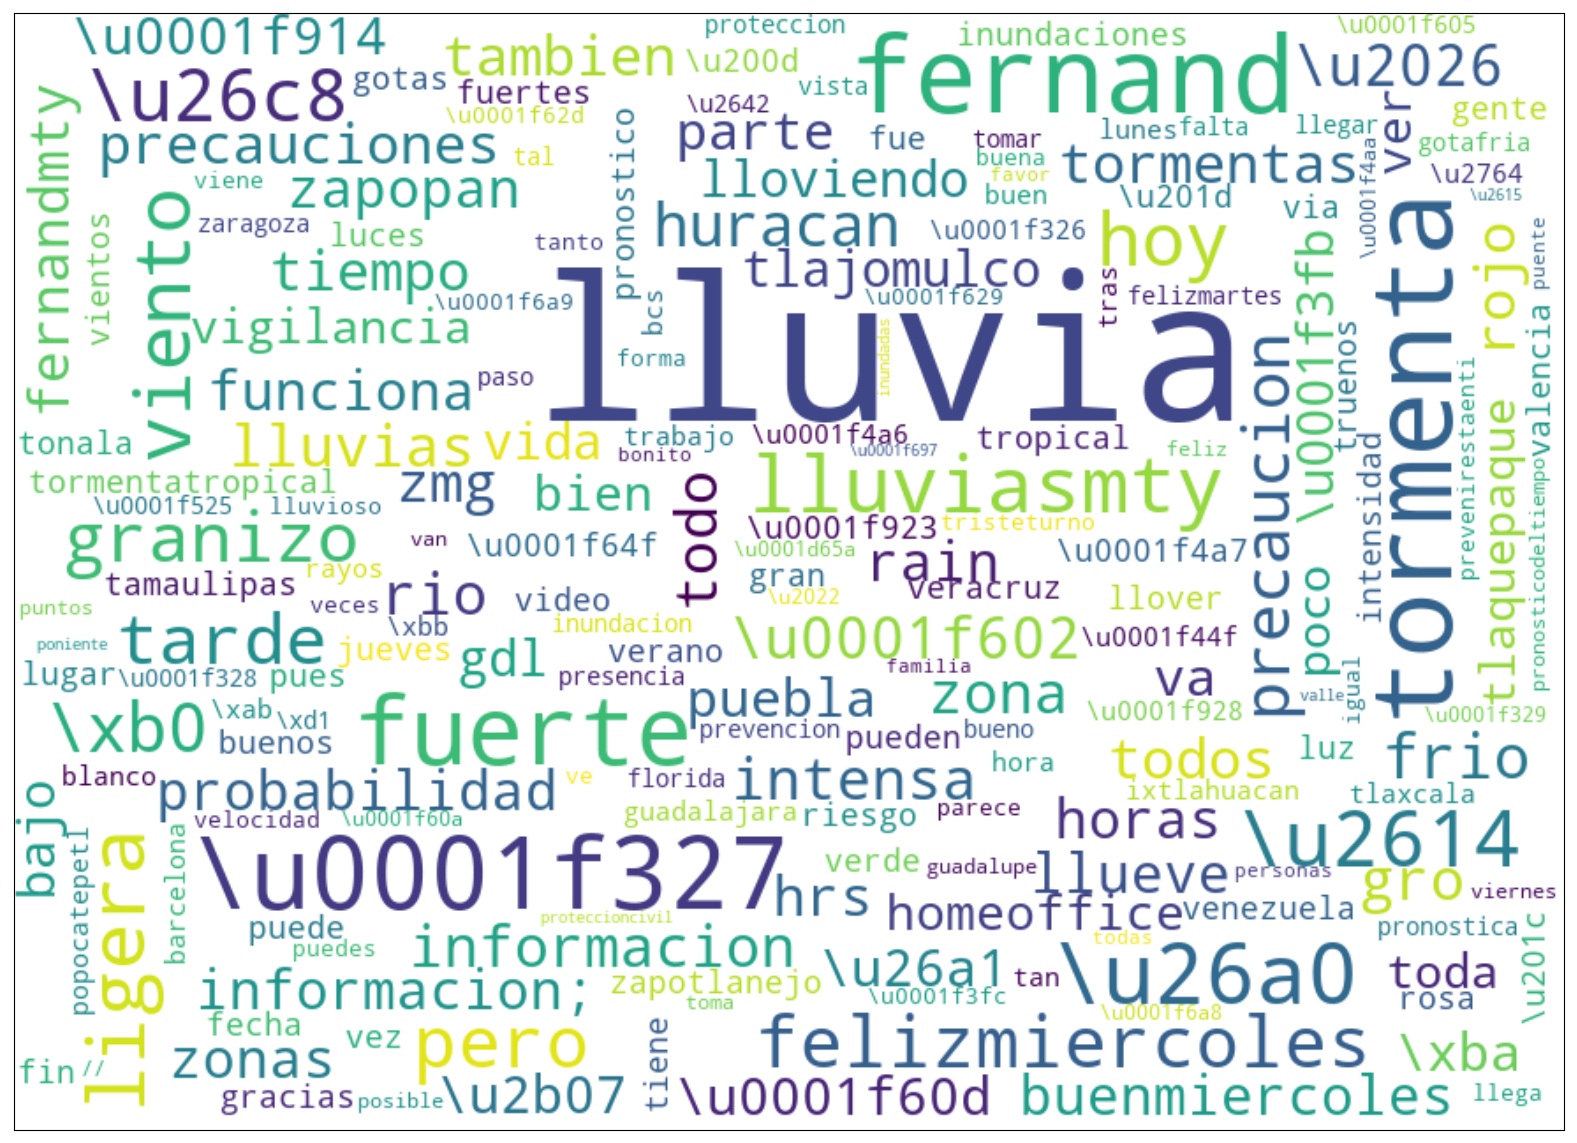

In [112]:
tw = scrapeo('Lluvia')
dic = diccionario(tw['Message'])

im = makeImage(dic[1])

In [68]:
sc = pd.read_csv('Twitter_Lluvia.csv')
dick = diccionario(sc['Message'])
#makeImage(dick[1])


## A esto no le des bola

In [110]:
emojis = sorted(dick[3].items(),key= lambda  x: x[1],reverse=True)
labels= []
frecs = []
for i in emojis:
    labels.append(i[0])
    frecs.append(i[1])
#print (labels)

prop = FontProperties(fname='emojione-android.ttf')


fig = plt.figure(figsize=(20,5))

p1 = plt.bar(np.arange(len(labels[:20])),frecs[:20])
#plt.text(5,5,labels[1],)
# Make labels
for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=10,
        fontproperties=prop
)
plt.show()

RuntimeError: In FT2Font: Could not set the fontsize

<Figure size 1440x360 with 1 Axes>

In [109]:
import cairo

In [2]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

file= '../eci2019-nlp/TP/eci2019nlp/fastText-0.9.1/cc.es.300.bin'

In [3]:
f = io.open(file)

In [5]:
f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 0: invalid start byte